Librería Scikit-Learn

Exploremos las cajas negras y aprendamos a trabajar con una nueva librería antes de pasar a la programación.

Los algoritmos de aprendizaje suelen ser más complejos que los modelos. Entonces, por ahora, piensa en ellos como cajas negras y concéntrate en lo que debes usar como entrada y qué hacer con la salida, en lugar de enfocarte en lo que sucede dentro.

El concepto de caja negra se puede comparar con pedir pizza. Para pedir una pizza, todo lo que tienes que hacer es elegir los ingredientes, dar tu dirección y esperar. En realidad, no te importa lo que sucede entre el pedido de la pizza y el repartidor que llama a la puerta. Si alguna vez quisieras abrir tu propia pizzería (es decir, hacer un trabajo académico sobre la mejora de algoritmos), necesitarías conocer todo el funcionamiento interno. Por ahora, deja la cocina a los profesionales entrenados. ¿Entiendes? ¿Entrenados... como en "modelo entrenado"?

Pero ¿dónde podemos conseguir una de estas cajas negras para entrenar a nuestro modelo? Las librerías de Python ofrecen muchos algoritmos. En esta lección trabajaremos con la popular librería scikit-learn o sklearn (kit científico para aprender).

Scikit-learn es una gran fuente de herramientas para trabajar con datos y modelos. La librería se divide en módulos para mayor comodidad. Los árboles de decisión se almacenan en el módulo tree.

Cada modelo corresponde a una clase separada en scikit-learn.  DecisionTreeClassifier es una clase para clasificaciones de árboles de decisión. Vamos a importarla desde la librería:


from sklearn.tree import DecisionTreeClassifier

Luego creamos una instancia de la clase:

model = DecisionTreeClassifier()

La variable model ahora almacena nuestro modelo, y tenemos que ejecutar un algoritmo de aprendizaje para entrenar el modelo para hacer predicciones.

Ejercicio 1

Comencemos con el entrenamiento del modelo. En la Lección 5 guardamos el conjunto de datos de entrenamiento en las variables features y target. Para iniciar el entrenamiento, llama al método fit() y pásale tus variables como argumento.

model.fit(features, target)

Finaliza el código e imprime la variable model en la pantalla (ya en el precódigo).

In [ ]:
import pandas as pd
from sklearn import set_config
from sklearn.tree import DecisionTreeClassifier


# no cambies estos parámetros de configuración
set_config(print_changed_only=False)

df = pd.read_csv('/datasets/train_data_us.csv')

df.loc[df['last_price'] > 113000, 'price_class'] = 1
df.loc[df['last_price'] <= 113000, 'price_class'] = 0

features = df.drop(['last_price', 'price_class'], axis=1)
target = df['price_class']

model = DecisionTreeClassifier()# crea un modelo vacío y asígnalo a una variable
model.fit(features, target) # entrena un modelo llamando al método fit()


print(model)

Resultado
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, random_state=None,
                       splitter='best')

Es correcto!

No te preocupes, todo funciona bien, el modelo está entrenado. Solo que no puedes imprimir mientras usas sklearn.

Ya que lo tratamos como una caja negra, no nos detendremos en ello, pero igual vamos a desglosarlo un poco:

class_weight=None — Cada clase tiene el mismo peso.
criterion='gini' — El índice de Gini mide la impureza en un nodo de un árbol de decisión. Un valor bajo indica nodos puros (datos de una clase), y un valor alto indica nodos impuros (datos mezclados de diferentes clases). Durante el entrenamiento, el árbol de decisión busca la división que más reduzca la impureza, según el índice de Gini, para crear nodos más homogéneos y mejorar la clasificación.
max_ depth=None — La profundidad del árbol es ilimitada.

2.

Ahora tenemos un modelo entrenado en la variable model . Para predecir respuestas, llama al método predict() y pásale la tabla con las características de las nuevas observaciones.

answers = model.predict(new_features)

Crea dos nuevas observaciones y verifica los resultados de la predicción. Recuerda que todo lo que está por encima y por debajo del precio mediano se etiqueta con las clases de precio 1 y 0, respectivamente. Las observaciones en nuestra tarea son apartamentos. Escribe los valores de las características para cada observación:

El primer apartamento tiene 12 dormitorios con una superficie total de 900 m². La superficie de la sala de estar es de 409.7 m² y la superficie de la cocina es de 112 m².

El segundo apartamento tiene 2 dormitorios con una superficie total de 109 m². La superficie de la sala de estar es de 32 m² y la de la cocina es de 40.5 m².

Casi no hay diferencia entre las características restantes. Ya las hemos incluido en el precódigo. No proporcionamos precio para estos dos casos experimentales, y se espera que nuestro clasificador entrenado adivine la clase correcta usando las características que especificamos. Predice la respuesta y muéstrala en la pantalla.

Las características que necesitas cambiar son: total_area, bedrooms, living_area y kitchen_area.

Utiliza estas plantillas:

new_features.loc[0, 'total_area'] =....
new_features.loc[1, 'total_area'] =.... y etc.
Luego llama al método model.predict() y aplícalo al DataFrame new_features. Guarda la predicción como answers. Muéstrala en la pantalla.

In [ ]:
new_features = pd.DataFrame(
    [
        [None, None, 2.8, 25, None, 25, 0, 0, 0, None, 0, 30706.0, 7877.0],
        [None, None, 2.75, 25, None, 25, 0, 0, 0, None, 0, 36421.0, 9176.0]
    ],
    columns=features.columns
)

# completa la tabla con las nuevas características
new_features.loc[0, 'total_area'] = 900.0
new_features.loc[0, 'bedrooms'] = 12.0
new_features.loc[0, 'living_area'] = 409.7
new_features.loc[0, 'kitchen_area'] = 112.0

new_features.loc[1, 'total_area'] = 109.0
new_features.loc[1, 'bedrooms'] = 2.0
new_features.loc[1, 'living_area'] = 32
new_features.loc[1, 'kitchen_area'] = 40.5

if new_features.isnull().values.any():
    new_features = new_features.fillna(features.mean())
# predice respuestas y muestra el resultado en la pantalla
answers = model.predict(new_features)

print(answers)

# output
#[1. 0.]

### Diagrama de flujo de machine learning

Compara el diagrama de flujo de machine learning con el código. ¿Hay algo nuevo? 

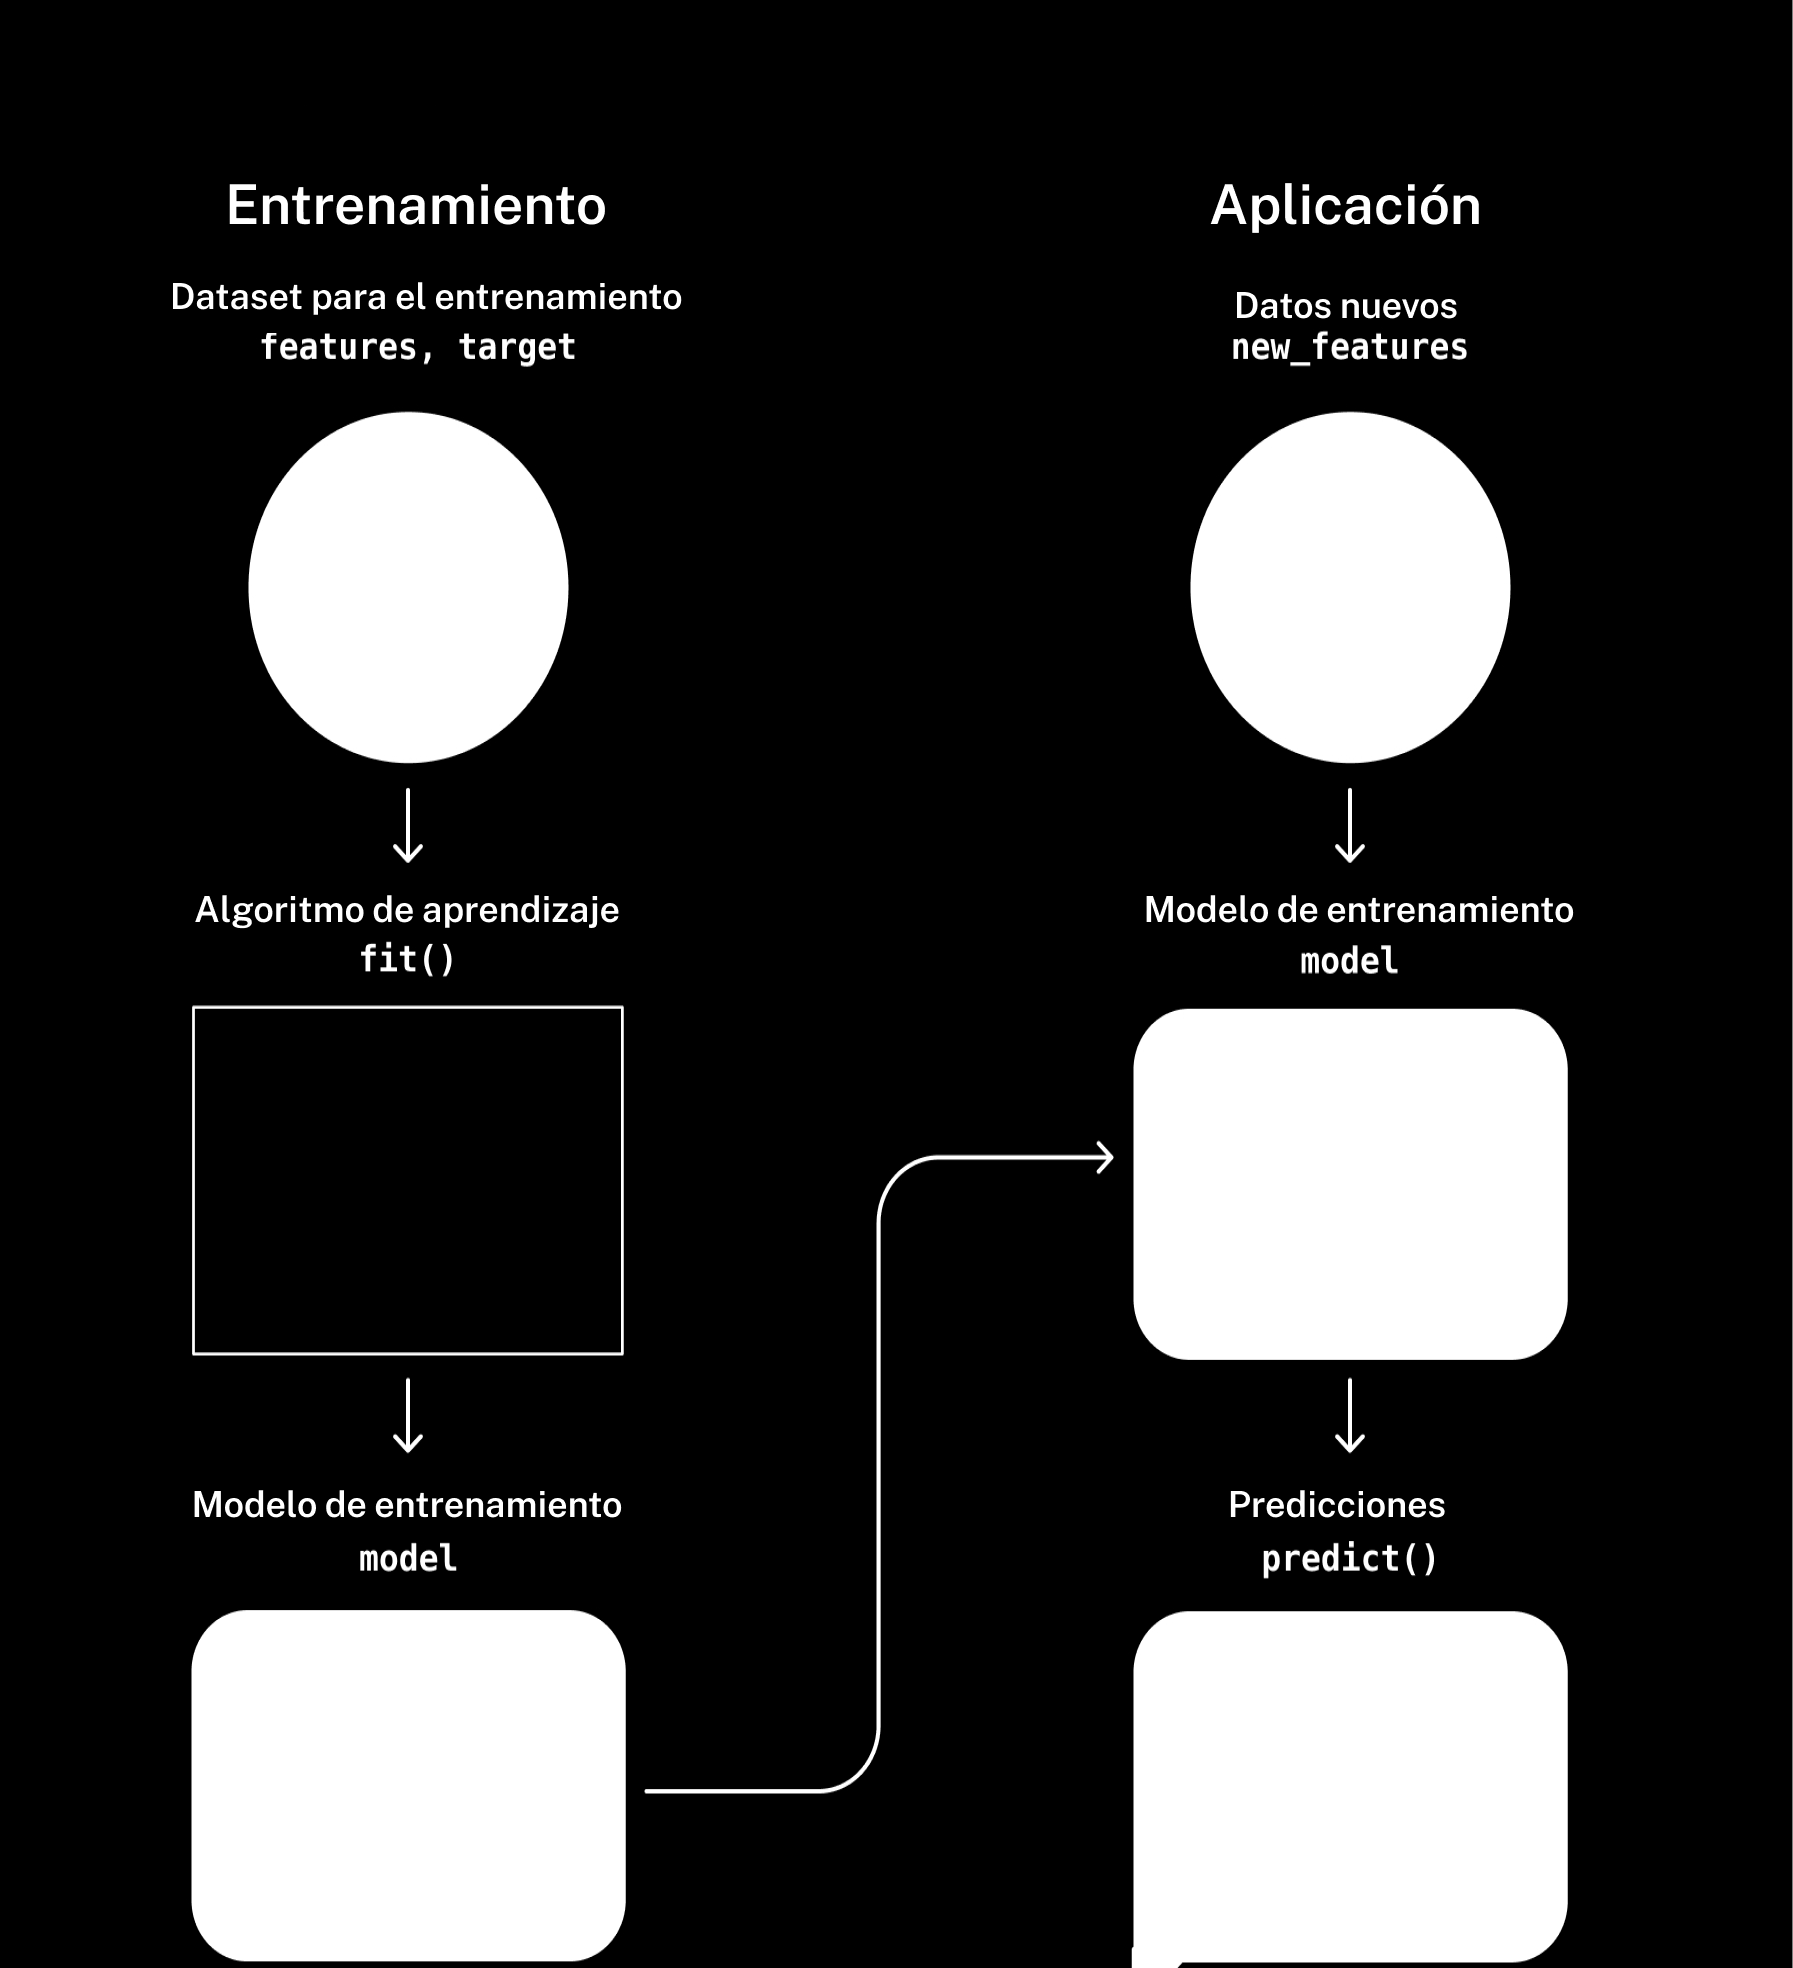


Esto es lo que tenemos:

- El conjunto de datos de entrenamiento se almacena en las variables features y target.
- Las características de las nuevas observaciones se registran en la variable new_features. Ahora necesitamos encontrar el objetivo.
- El método fit() se usa para entrenamiento, y el método predict() se usa para prueba.
- El modelo se almacena en la variable model. Una vez que hayas terminado de entrenarlo, lo puedes utilizar para la predicción.

Presentación del modelo
Averigüemos cómo se ve un modelo entrenado y qué hay dentro de él.

¿Habrías imaginado que un modelo contiene unos cuantos de miles de strings de código como estos?

|--- total_area <= 60.75
|   |--- total_area <= 46.36
|   |   |--- city_center_dist <= 7959.50
|   |   |   |--- kitchen_area <= 8.10
|   |   |   |   |--- living_area <= 21.45
|   |   |   |   |   |--- living_area <= 12.50
|   |   |   |   |   |   |--- kitchen_area <= 7.50
|   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |--- kitchen_area >  7.50
|   |   |   |   |   |   |   |--- class: 1.0
|   |   |   |   |   |--- living_area >  12.50
|   |   |   |   |   |   |--- total_area <= 33.75
...
Es demasiado complicado. Este programa fue escrito por otro programa, por ello, no debes esperar que sea legible para las personas.

Hay algoritmos dedicados que pueden ayudarnos a convertir modelos complicados (como este árbol de decisión) en algo más comprensible. Esto es lo que obtenemos:

|--- total_area <= 60.75
|   |--- total_area <= 46.36
|   |   |--- class: 0.0
|   |--- total_area >  46.36
|   |   |--- ceiling_height <= 2.69
|   |   |   |--- class: 0.0
|   |   |--- ceiling_height >  2.69
|   |   |   |--- class: 1.0
|--- total_area >  60.75
|   |--- class: 1.0
En Python, el mismo texto se ve así:

if features['total_area'] <= 60.75:
    if features['total_area'] <= 46.36:
        answer = 0
    else:
        if features['ceiling_height'] <= 2.69:
            answer = 0
        else:
            answer = 1
else:
    answer = 1
Así es como se ve como un gráfico:

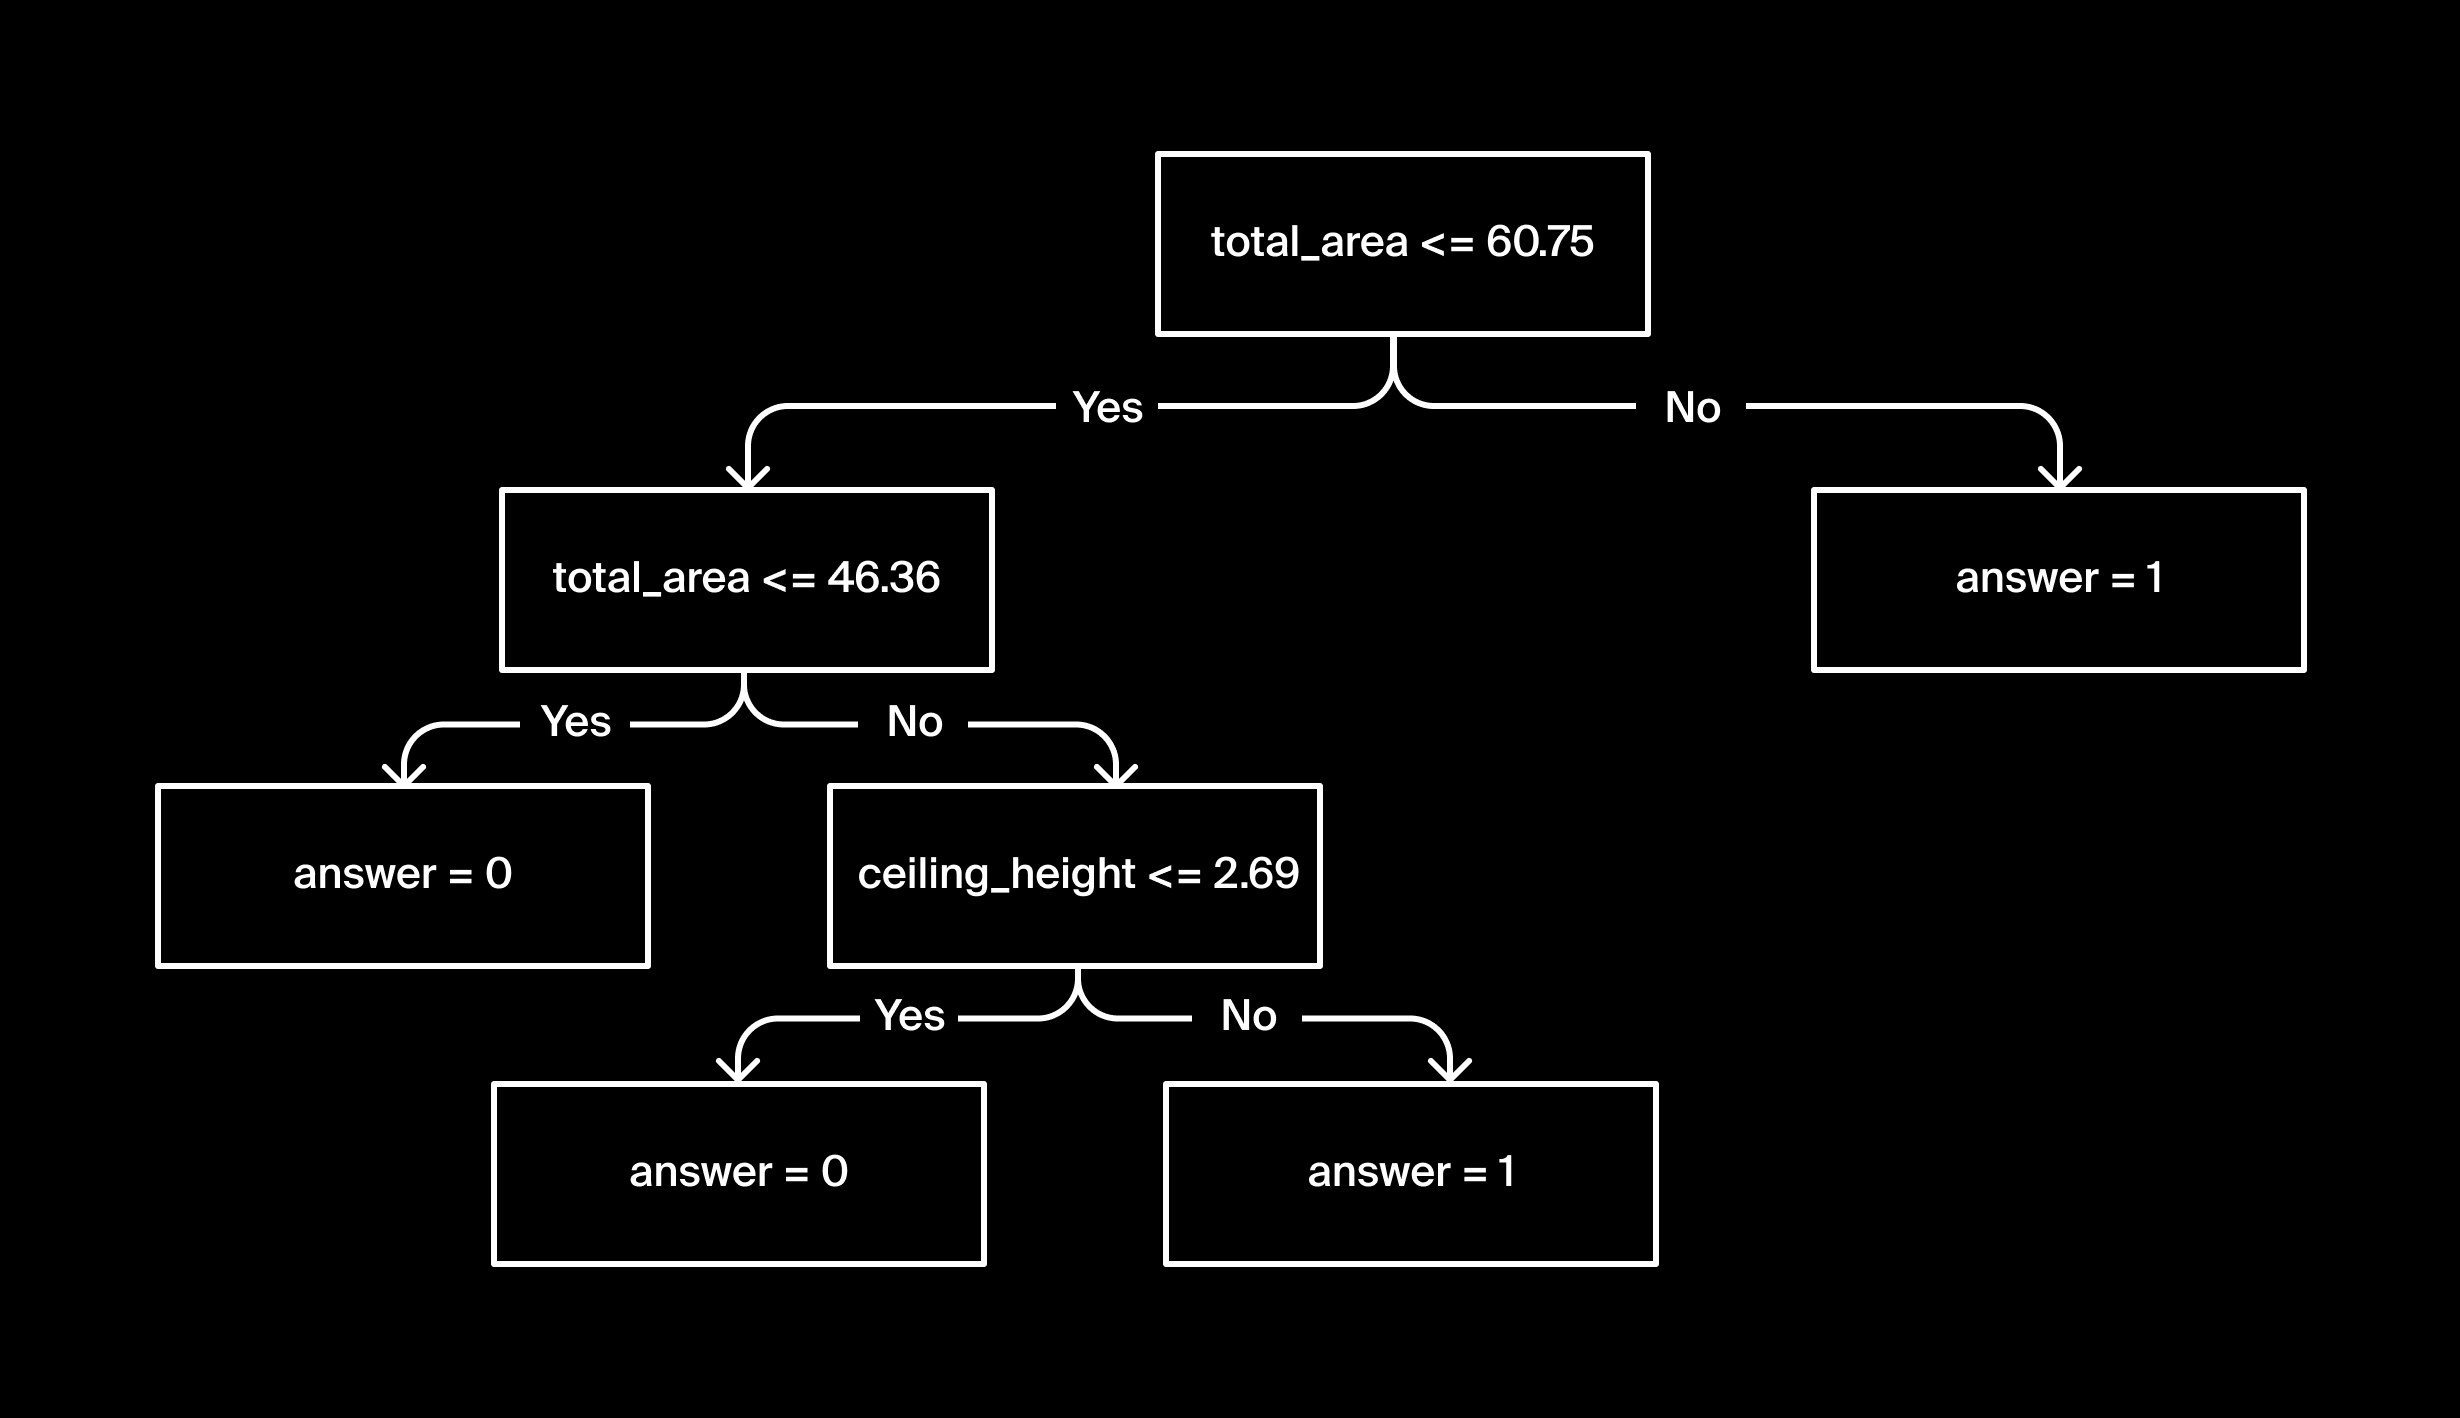

¡Qué condiciones tan extrañas! Pero a la máquina no le importan los números bonitos.

En algunos casos, especialmente cuando tratamos con personas (por ejemplo, en diagnósticos clínicos o análisis de cuestionarios), la capacidad de mirar dentro del modelo y ver cómo aborda la tarea es crucial para prevenir escenarios no deseados, como la discriminación laboral. Sin embargo, para las tareas comerciales, la transparencia del modelo es opcional. Si funciona, no lo arregles.